In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

In [2]:
# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

### 데이터 불러오기 및 전처리

In [4]:
df = pd.read_csv("../../01.files/02.Bigsata_analysis/보험료.csv", encoding = 'euc-kr')
df.head()

,고객번호,성별,나이,BMI,자녀수,흡연여부,가입유형,납부유형,보장범위,납입기간,보험료
0,ID100001,남성,19,27.9,0,1,홈쇼핑,은행,19,40,168849
1,ID100002,여성,18,33.8,1,0,인터넷,은행,10,40,17255
2,ID100003,여성,28,33.0,3,0,상담사,카드,12,30,44494
3,ID100004,여성,33,22.7,0,0,홈쇼핑,지로,15,30,219844
4,ID100005,여성,32,28.9,0,0,인터넷,카드,9,30,38668


In [5]:
df.describe()

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료
count,1343.00000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,39.18615,30.666493,1.093075,0.204765,11.574832,28.220402,132549.094564
std,14.07208,6.091088,1.205849,0.403680,2.532388,6.094558,121072.475861
min,18.00000,16.000000,0.000000,0.000000,8.000000,20.000000,11218.000000
25%,26.00000,26.300000,0.000000,0.000000,10.000000,20.000000,47196.000000
50%,39.00000,30.400000,1.000000,0.000000,11.000000,30.000000,93779.000000
75%,51.00000,34.700000,2.000000,0.000000,12.000000,30.000000,166220.500000
max,64.00000,53.100000,5.000000,1.000000,20.000000,40.000000,637704.000000


In [6]:
'''
결측치가 총 5개 존재하나, 크지 않고, 현재로써는 알 수 있는 방법이 없으므로
결측치가 존재하는 행을 제거하기로 결정함
'''

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객번호    1343 non-null   object 
 1   성별      1343 non-null   object 
 2   나이      1343 non-null   int64  
 3   BMI     1343 non-null   float64
 4   자녀수     1343 non-null   int64  
 5   흡연여부    1343 non-null   int64  
 6   가입유형    1341 non-null   object 
 7   납부유형    1340 non-null   object 
 8   보장범위    1343 non-null   int64  
 9   납입기간    1343 non-null   int64  
 10  보험료     1343 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 115.5+ KB


고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    2
납부유형    3
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

고객번호    0
성별      0
나이      0
BMI     0
자녀수     0
흡연여부    0
가입유형    0
납부유형    0
보장범위    0
납입기간    0
보험료     0
dtype: int64

In [8]:
'''
고객번호는 각 고객이 가지고 있는 고유한 값이므로, 변수로써 사용할 수 없기 때문에 제거
'''

df = df.drop(['고객번호'], axis = 1)
df = pd.get_dummies(df, drop_first = True)
df

,나이,BMI,자녀수,흡연여부,보장범위,납입기간,보험료,성별_여성,가입유형_인터넷,가입유형_홈쇼핑,납부유형_지로,납부유형_카드
0,19,27.9,0,1,19,40,168849,0,0,1,0,0
1,18,33.8,1,0,10,40,17255,1,1,0,0,0
2,28,33.0,3,0,12,30,44494,1,0,0,0,1
3,33,22.7,0,0,15,30,219844,1,0,1,1,0
4,32,28.9,0,0,9,30,38668,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,10,20,106005,1,0,1,1,0
1335,18,36.9,0,0,9,40,16298,0,1,0,0,0
1337,61,29.1,0,1,12,20,291413,0,0,1,0,1
1338,50,31.0,3,0,10,20,106005,1,0,1,1,0


In [9]:
# 데이터 분리

df_y = df['보험료']
df_x = df.drop(['보험료'], axis = 1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=777)

print("df_train_x:",df_train_x.shape)
print("df_test_x:",df_test_x.shape)
print("df_train_y:",df_train_y.shape)
print("df_test_y:",df_test_y.shape)

df_train_x: (936, 11)
df_test_x: (402, 11)
df_train_y: (936,)
df_test_y: (402,)


### 규제화 회귀분석 모델 설계 및 학습

In [10]:
# alpha 값에 따른 성능 그래프 그리기

def draw_score(metric_df):
    plt.plot(metric_df['alpha'], metric_df['train'], label = 'train_score')
    plt.plot(metric_df['alpha'], metric_df['test'], label = 'test_score')
    plt.legend()

    plt.show()

In [11]:
alpha_list = [1,5,10,30,50,100]

## Ridge

In [12]:
# Ridge 모델

def ridge_run(data_train_x, data_train_y , data_test_x, data_test_y, alpha_list):
    temp_df = pd.DataFrame()
    temp_df = pd.DataFrame(index = data_train_x.columns)
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
    axes = axes.flatten()
    train_v, test_v = [], []
    for i, a in enumerate(alpha_list):
        ridge = Ridge(random_state=777, alpha = a)
        ridge.fit(data_train_x, data_train_y)
        print("alpha :",a," | bias:",ridge.intercept_)
        temp_df[str(a)] = ridge.coef_
        temp_df.plot.barh(y = str(a), legend = False, ax = axes[i])
        axes[i].set_title(f"Alpha = {a}")

        #예측 결과
        train_pred = ridge.predict(data_train_x)
        test_pred = ridge.predict(data_test_x)
        train_v.append(r2_score(data_train_y, train_pred))
        test_v.append(r2_score(data_test_y, test_pred))
        #print("\ttrain data의 결정계수:", r2_score(df_train_y, train_pred))
        #print("\ttest data의 결정계수:", r2_score(df_test_y, test_pred))    
    
    plt.tight_layout() 
    plt.show()
    metric_df = pd.DataFrame({
        'alpha' : alpha_list,
        'train' : train_v,
        'test' : test_v
    })
    return temp_df, metric_df

alpha : 1  | bias: -50248.40046564261
alpha : 5  | bias: -54056.61344405661
alpha : 10  | bias: -58283.86060848499
alpha : 30  | bias: -71003.9265355539
alpha : 50  | bias: -79548.2042110295
alpha : 100  | bias: -92317.82653940858


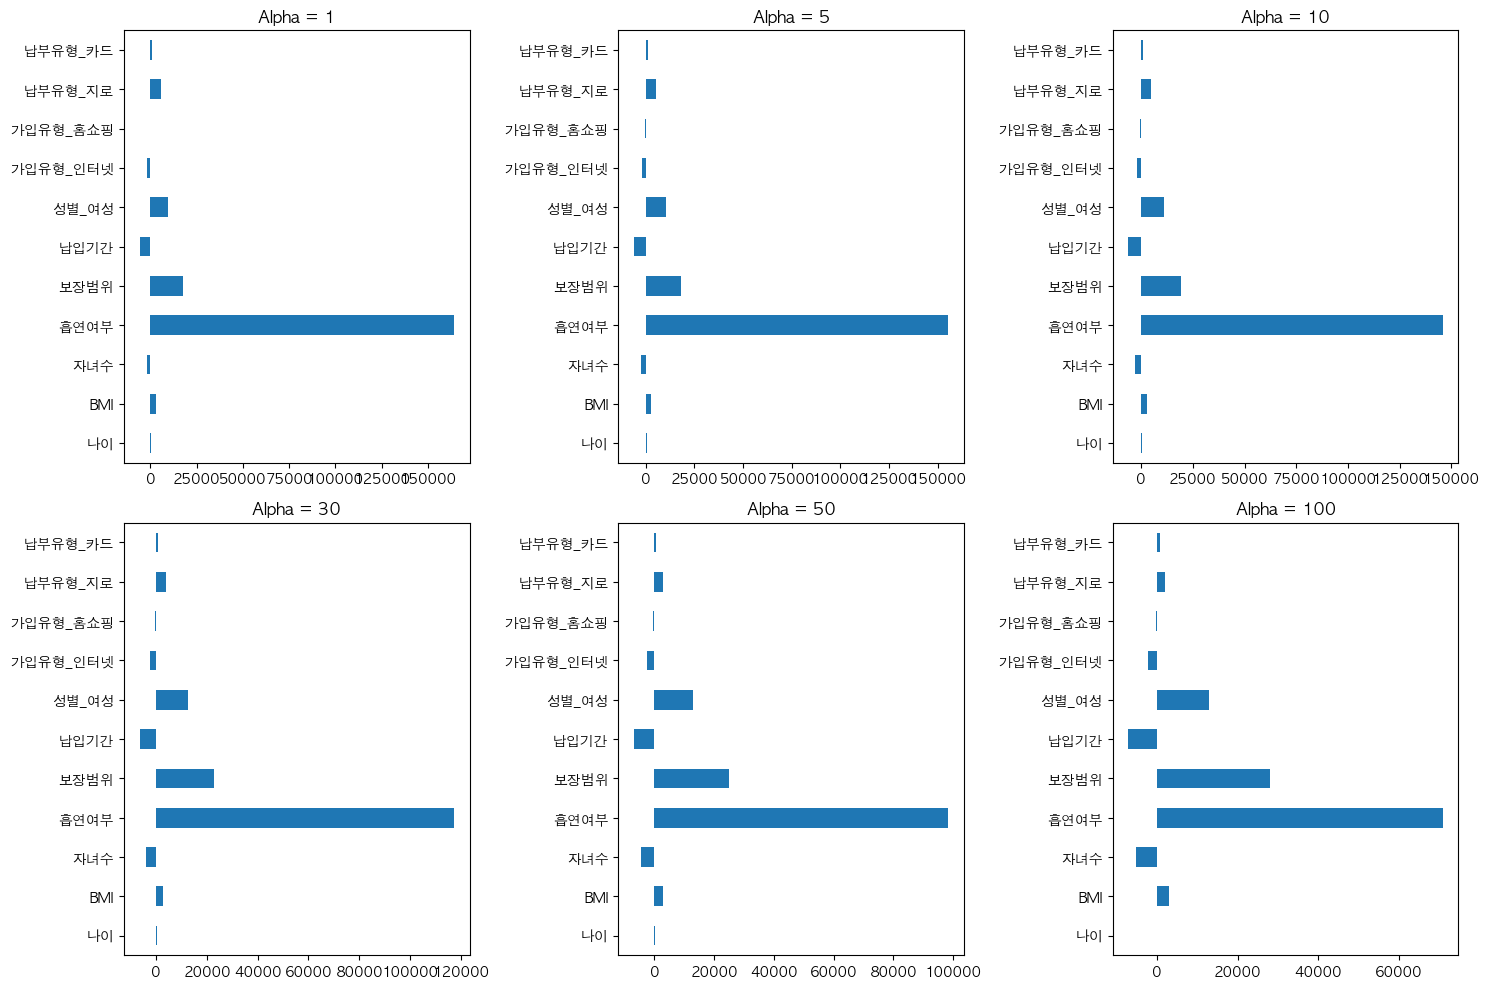

In [13]:
coef_df, metric_df = ridge_run(df_train_x, df_train_y, df_test_x, df_test_y, alpha_list)

In [14]:
coef_df

,1,5,10,30,50,100
나이,541.314804,489.846185,433.594835,271.341220,170.517952,40.844575
BMI,2882.100216,2874.547799,2866.505562,2844.849895,2832.977096,2820.882815
자녀수,-1926.216793,-2295.177851,-2696.507783,-3837.537642,-4524.973810,-5345.859367
흡연여부,164049.211850,155370.947784,145783.368215,117255.012822,98408.405878,70874.165729
보장범위,17387.596251,18413.948000,19543.134534,22862.210362,25001.889119,27971.734834
납입기간,-5827.560833,-5963.392890,-6111.824022,-6539.552456,-6804.503335,-7141.760145
성별_여성,9647.768849,10273.644186,10913.559922,12413.637363,12954.910370,12743.206914
가입유형_인터넷,-1814.928754,-1960.421058,-2102.468433,-2396.543761,-2469.931278,-2365.440201
가입유형_홈쇼핑,-180.570042,-255.157182,-321.729344,-417.337833,-393.389962,-235.129933
납부유형_지로,5496.508430,5155.964140,4782.903709,3697.729828,3007.537387,2052.847000


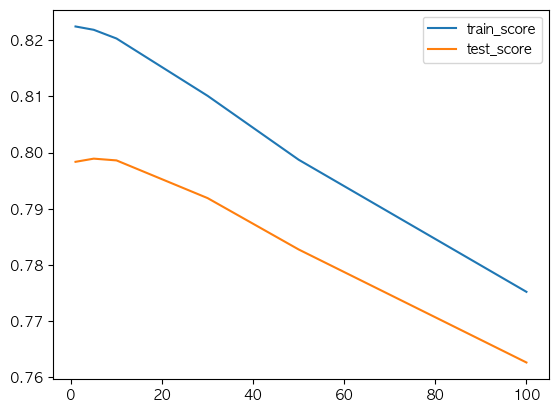

In [15]:
draw_score(metric_df)

#### '흡연여부' 변수
'흡연여부' 변수의 회귀계수가 높기 때문에, 모델의 예측에 대부분의 기여를 한다고 생각하고,
학습 데이터에서 제거하여 다시 학습을 진행해보았다.

1. 흡연여부 변수의 유무에 따라 모델 성능 예측이 대폭 떨어지는 것을 확인할 수 있다
2. 알파값이 늘어남에 따라 train의 성능은 계속해서 떨어지고, test의 성능은 상승세를 보이나 alpha값이 더 늘어날 때는 성능이 둘 다 하락하는 모양새를 보인다.
3. '흡연여부' 변수가 보험료를 예측하는데 중요한 역할을 하는 변수임을 알 수 있다.
  

In [16]:
# 데이터 분리

df_y_fe = df['보험료']
df_x_fe = df.drop(['보험료', '흡연여부'], axis = 1, inplace=False)

df_train_x_f, df_test_x_f, df_train_y_f, df_test_y_f = train_test_split(df_x_fe, df_y_fe, test_size=0.3, random_state=777)

print("df_train_x:",df_train_x_f.shape)
print("df_test_x:",df_test_x_f.shape)
print("df_train_y:",df_train_y_f.shape)
print("df_test_y:",df_test_y_f.shape)

df_train_x: (936, 10)
df_test_x: (402, 10)
df_train_y: (936,)
df_test_y: (402,)


alpha : 1  | bias: -121326.26151757427
alpha : 5  | bias: -121498.56691768834
alpha : 10  | bias: -121696.4584861989
alpha : 30  | bias: -122343.18785868092
alpha : 50  | bias: -122835.73107332208
alpha : 100  | bias: -123718.57888506733


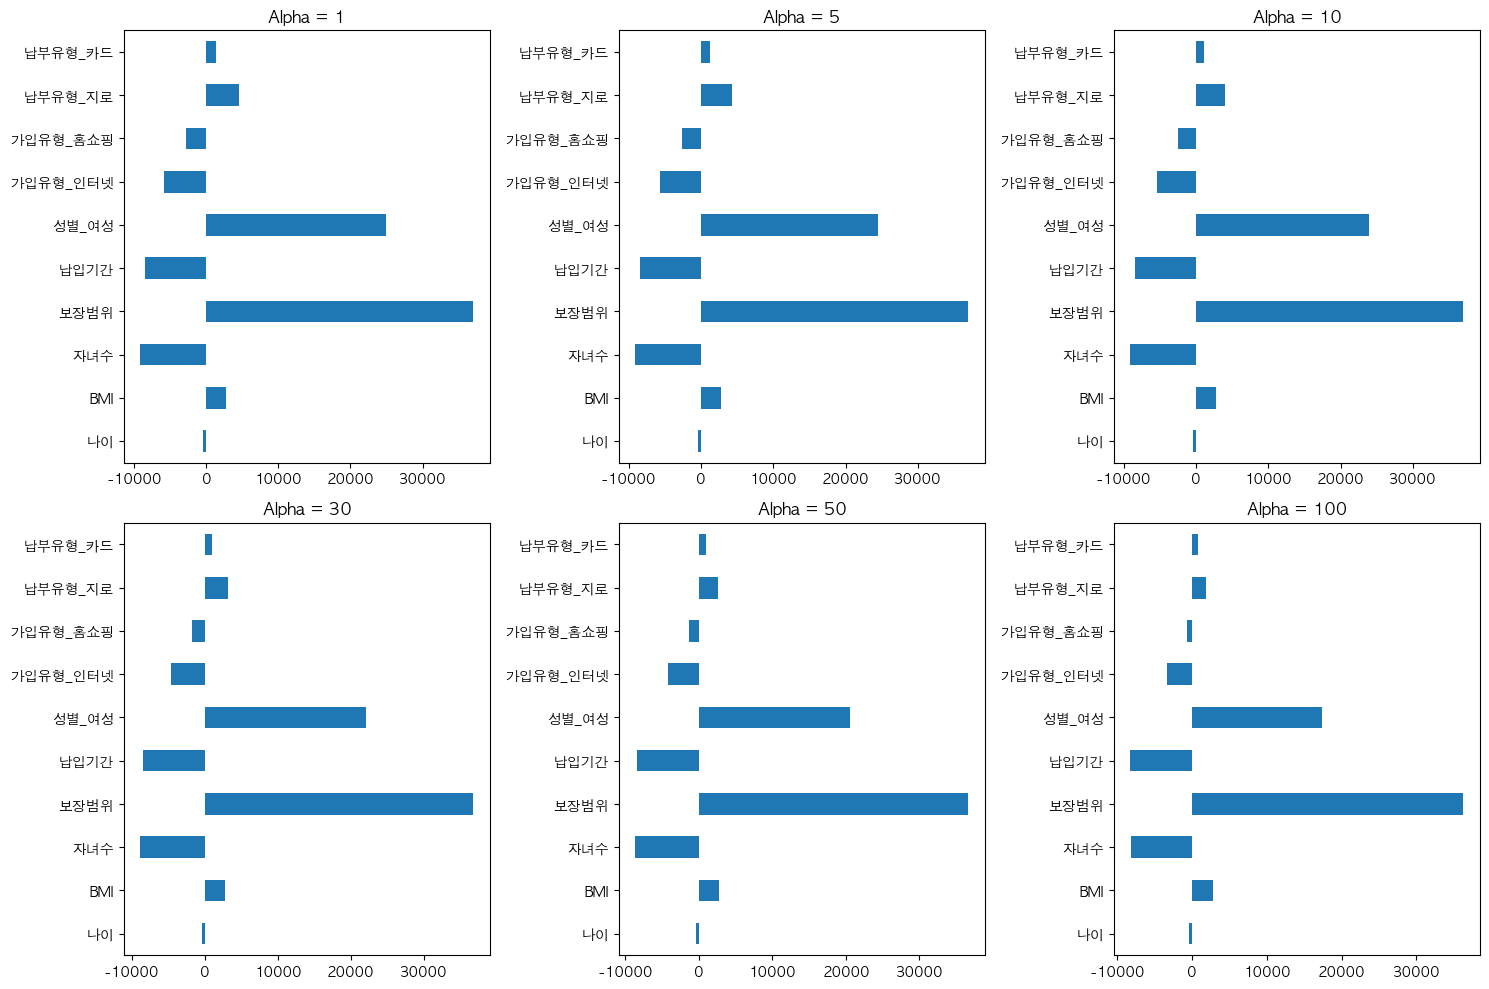

In [17]:
coef_df, metric_df = ridge_run(df_train_x_f, df_train_y_f, df_test_x_f, df_test_y_f, alpha_list )

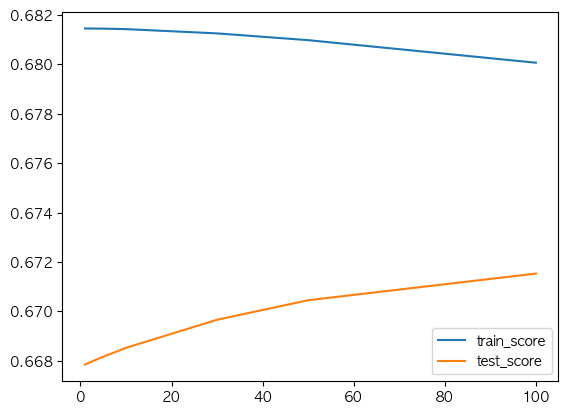

In [18]:
draw_score(metric_df)

alpha : 100  | bias: -123718.57888506733
alpha : 150  | bias: -124350.27125988532
alpha : 200  | bias: -124852.53086520969
alpha : 250  | bias: -125273.2414107436
alpha : 300  | bias: -125635.21721602739
alpha : 350  | bias: -125950.96770775515


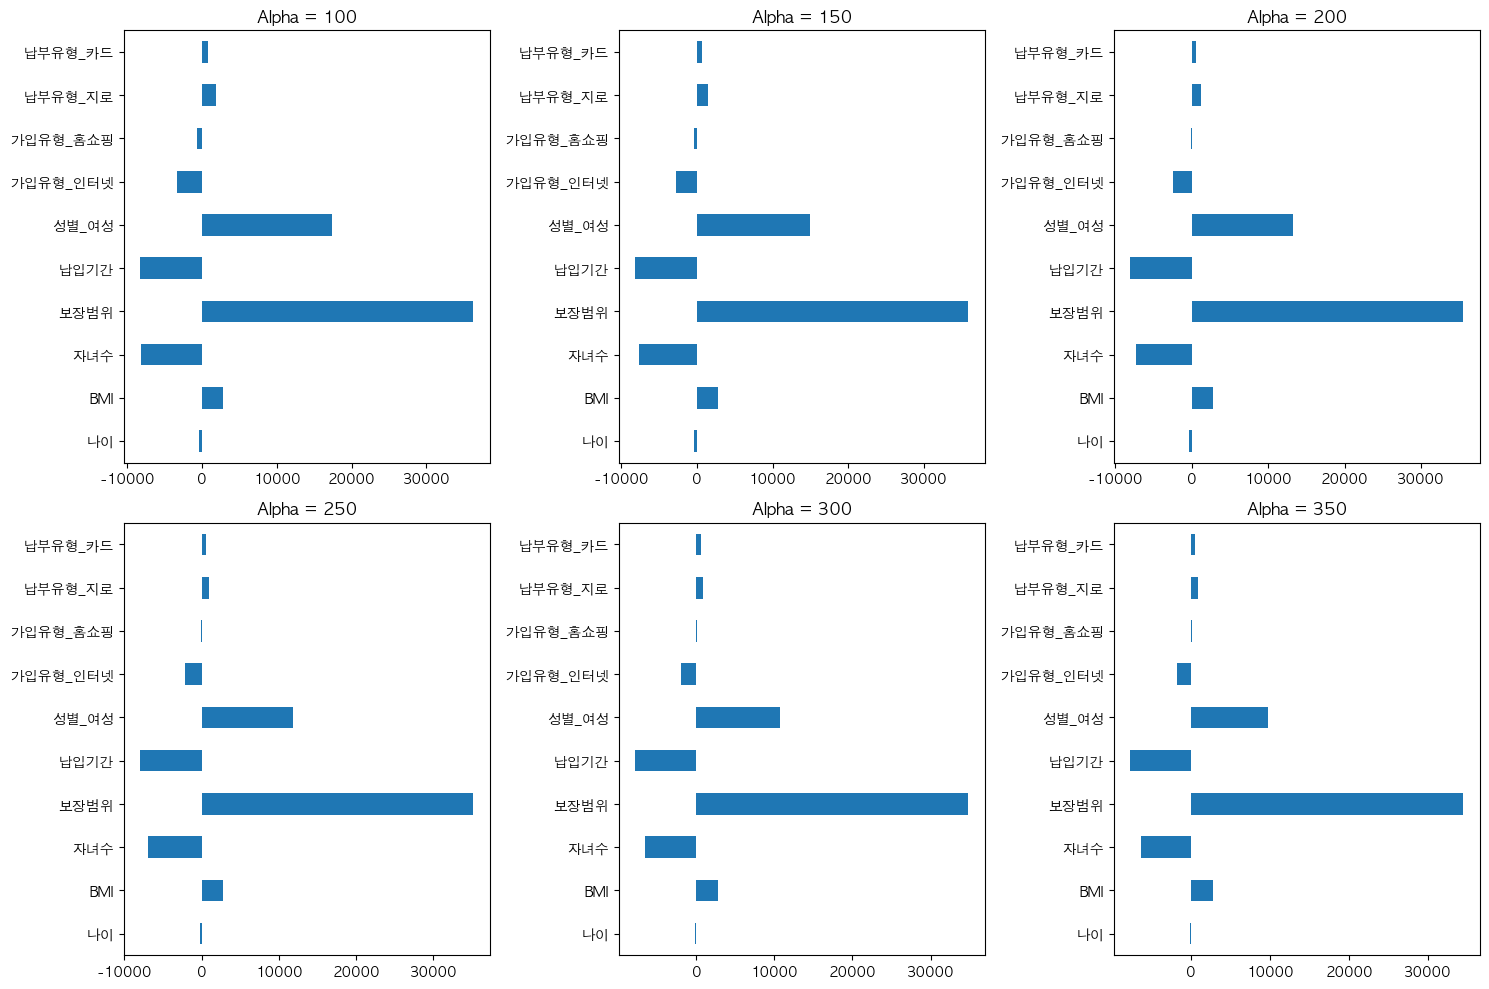

In [19]:
a_list = [100,150,200,250,300,350]
coef_df, metric_df = ridge_run(df_train_x_f, df_train_y_f, df_test_x_f, df_test_y_f, a_list )

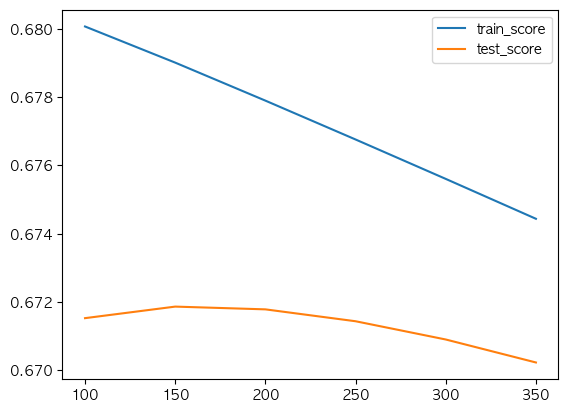

In [20]:
draw_score(metric_df)

### ridge 모델에 대한 분석
- 흡연변수가 삭제될 경우, 모델의 예측에 지대한 영향을 끼치는 것을 확인하였고
  흡연변수를 다시 포함하기로 결정함.
- 또한 모델의 성능은 Alpha값이 늘어날수록 저하되는 경향이 보이므로,
   Ridge 모델에서 사용할 Alpha값은 1로 결정함

## Lasso

In [21]:
# Lasso 모델

def lasso_run(data_train_x, data_train_y , data_test_x, data_test_y, alpha_list):
    temp_df = pd.DataFrame()
    temp_df = pd.DataFrame(index = data_train_x.columns)
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
    axes = axes.flatten()
    train_v, test_v = [], []
    for i, a in enumerate(alpha_list):
        lasso = Lasso(random_state=777, alpha = a)
        lasso.fit(data_train_x, data_train_y)
        print("alpha :",a," | bias:",lasso.intercept_)
        temp_df[str(a)] = lasso.coef_
        temp_df.plot.barh(y = str(a), legend = False, ax = axes[i])
        axes[i].set_title(f"Alpha = {a}")

        #예측 결과
        train_pred = lasso.predict(data_train_x)
        test_pred = lasso.predict(data_test_x)
        train_v.append(r2_score(data_train_y, train_pred))
        test_v.append(r2_score(data_test_y, test_pred))
        #print("\ttrain data의 결정계수:", r2_score(df_train_y, train_pred))
        #print("\ttest data의 결정계수:", r2_score(df_test_y, test_pred))    
    
    plt.tight_layout() 
    plt.show()
    metric_df = pd.DataFrame({
        'alpha' : alpha_list,
        'train' : train_v,
        'test' : test_v
    })
    return coef_df, metric_df


alpha : 1  | bias: -49241.21256218497
alpha : 5  | bias: -49293.39892883027
alpha : 10  | bias: -49357.16235427624
alpha : 30  | bias: -49480.72349641875
alpha : 50  | bias: -49587.39543021897
alpha : 100  | bias: -49806.99127220128


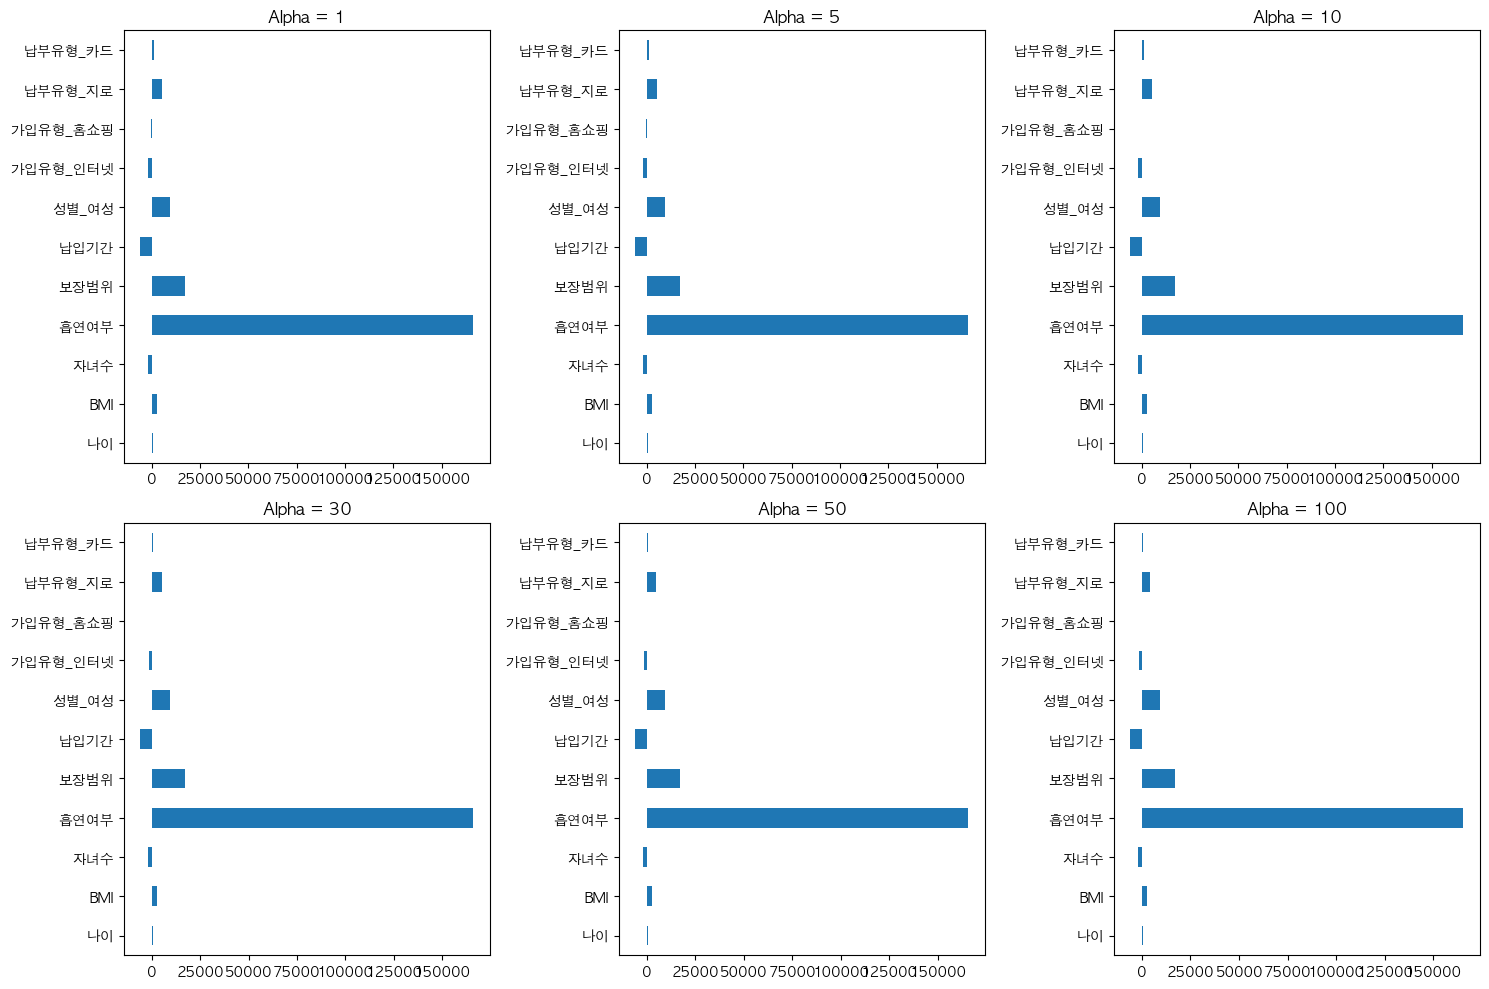

In [22]:
coef_df, metric_df = lasso_run(df_train_x, df_train_y, df_test_x, df_test_y,alpha_list)

In [23]:
coef_df

,100,150,200,250,300,350
나이,-375.043159,-332.968545,-293.795101,-256.835670,-221.656878,-187.967283
BMI,2762.129986,2775.303765,2785.348907,2793.358591,2799.942346,2805.473461
자녀수,-8153.153695,-7722.304991,-7328.371305,-6965.944173,-6630.950278,-6320.167416
보장범위,36278.868140,35904.415932,35541.595239,35189.322345,34846.687438,34512.946228
납입기간,-8244.076878,-8124.116048,-8011.568105,-7904.839304,-7802.887512,-7704.993197
성별_여성,17342.596382,15018.199082,13234.942392,11823.678140,10679.171885,9732.477819
가입유형_인터넷,-3322.016909,-2806.168681,-2454.635536,-2197.709321,-2000.729014,-1844.338817
가입유형_홈쇼핑,-673.035251,-339.325387,-143.274029,-18.176711,66.321334,125.799801
납부유형_지로,1825.275485,1427.094065,1184.544435,1021.689811,904.845780,816.866997
납부유형_카드,769.904718,681.489242,618.682139,570.181446,530.937372,498.232178


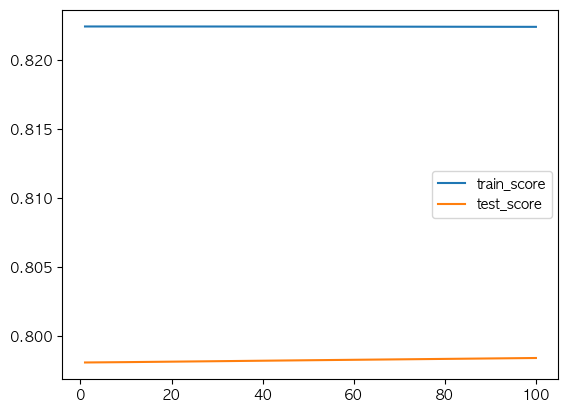

In [24]:
draw_score(metric_df)

In [25]:
metric_df

,alpha,train,test
0,1,0.822459,0.798068
1,5,0.822459,0.798079
2,10,0.822458,0.798093
3,30,0.822456,0.798161
4,50,0.822452,0.798230
5,100,0.822432,0.798393


### lasso 모델에 대한 분석
- lasso 모델 또한 흡연변수가 가장 높은 회귀계수를 가지고 있고, 영향을 가장 많이 끼치지만
  예측에 중요한 변수라고 생각되어 그대로 두었음.
- 또한 모델의 성능은 Alpha값이 늘어날수록 학습데이터 셋의 예측은 저하되는 경향이 보이나,
   테스트데이터 셋의 예측은 약간씩 올라가는 경향이 보임.
  학습데이터에 따른 성능의 저하는 미미한 차이이기 때문에 alpha 값은 100을 선택함

## Elastic

In [26]:
# Elastic 모델

def elastic_run(data_train_x, data_train_y , data_test_x, data_test_y, alpha_list):
    temp_df = pd.DataFrame()
    temp_df = pd.DataFrame(index = data_train_x.columns)
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
    axes = axes.flatten()
    train_v, test_v = [], []
    for i, a in enumerate(alpha_list):
        elastic = ElasticNet(random_state=777, alpha = a)
        elastic.fit(data_train_x, data_train_y)
        print("alpha :",a," | bias:",elastic.intercept_)
        temp_df[str(a)] = elastic.coef_
        temp_df.plot.barh(y = str(a), legend = False, ax = axes[i])
        axes[i].set_title(f"Alpha = {a}")

        #예측 결과
        train_pred = elastic.predict(data_train_x)
        test_pred = elastic.predict(data_test_x)
        train_v.append(r2_score(data_train_y, train_pred))
        test_v.append(r2_score(data_test_y, test_pred))
        #print("\ttrain data의 결정계수:", r2_score(df_train_y, train_pred))
        #print("\ttest data의 결정계수:", r2_score(df_test_y, test_pred))    
    
    plt.tight_layout() 
    plt.show()
    metric_df = pd.DataFrame({
        'alpha' : alpha_list,
        'train' : train_v,
        'test' : test_v
    })
    return temp_df, metric_df


alpha : 1  | bias: -115135.05128395297
alpha : 5  | bias: -121261.63836251594
alpha : 10  | bias: -110972.92236481376
alpha : 30  | bias: -66402.75481547123
alpha : 50  | bias: -36914.25500339347
alpha : 100  | bias: 4127.6019067267625


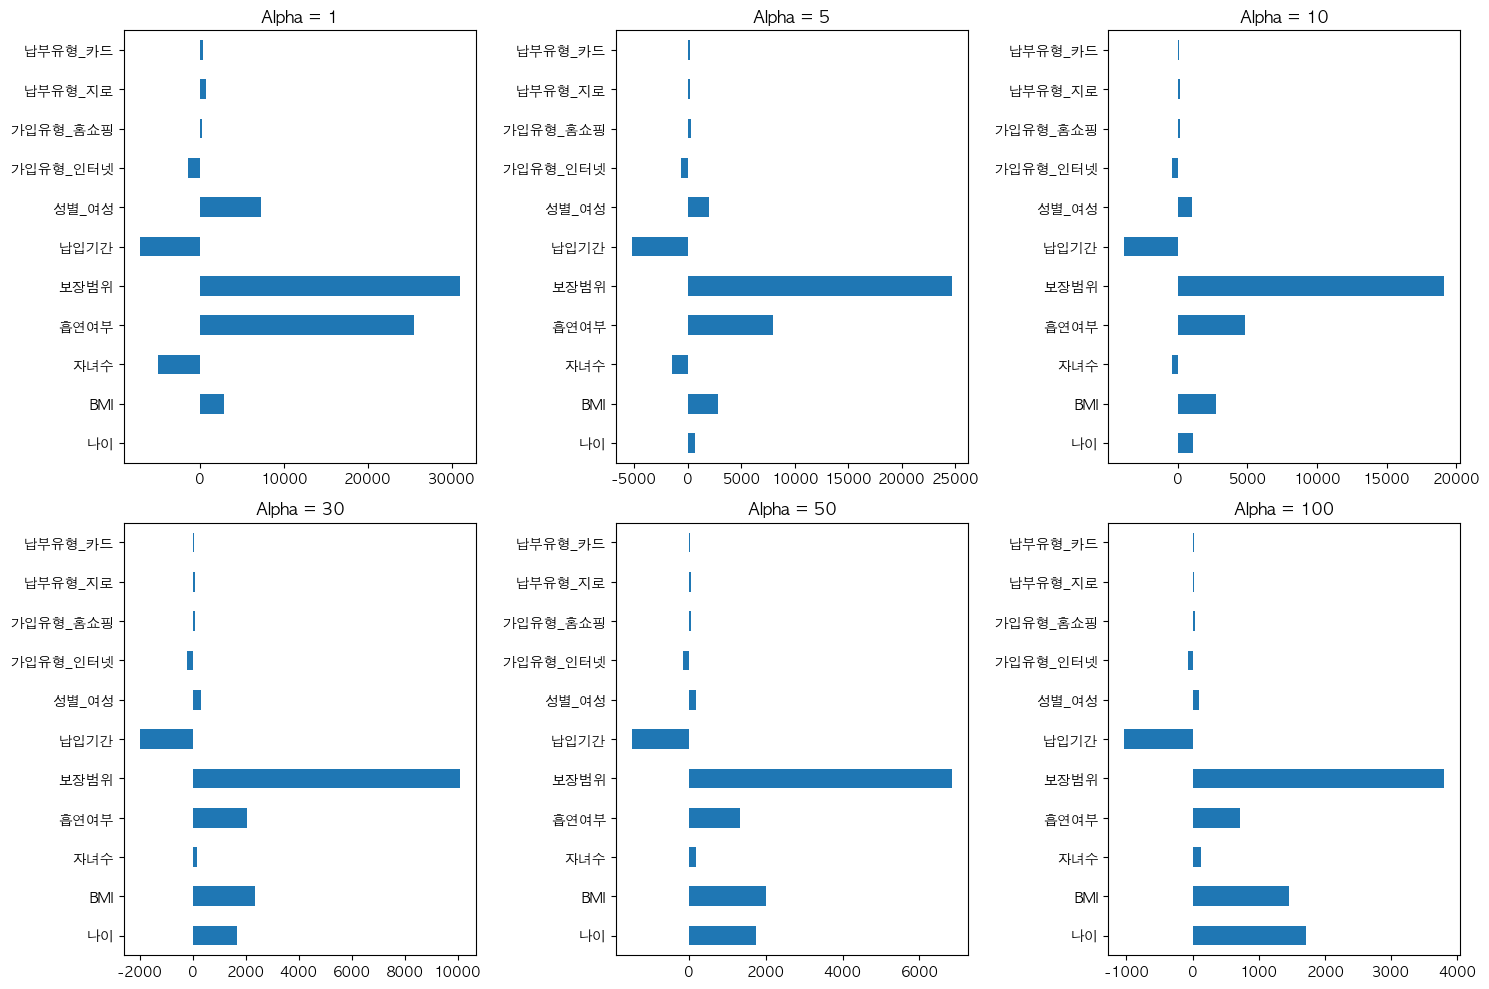

In [27]:
coef_df, metric_df = elastic_run(df_train_x, df_train_y, df_test_x, df_test_y,alpha_list)

In [28]:
coef_df

,1,5,10,30,50,100
나이,16.795925,669.837735,1117.604614,1659.740766,1753.900754,1713.726571
BMI,2829.485015,2831.268795,2753.731553,2339.111298,1999.686008,1460.327036
자녀수,-4934.503179,-1442.684310,-377.268586,172.402323,178.669888,127.029753
흡연여부,25528.938891,7969.978610,4847.760835,2062.037119,1330.894836,708.869667
보장범위,30978.443844,24691.528782,19146.992365,10080.313446,6847.059958,3800.685391
납입기간,-7146.906356,-5190.864114,-3828.642926,-1994.434637,-1473.071288,-1033.253083
성별_여성,7266.924654,1976.715642,1000.908379,327.469795,195.252776,97.385503
가입유형_인터넷,-1426.185776,-638.006249,-434.422278,-208.232933,-139.497250,-77.321663
가입유형_홈쇼핑,231.486918,269.523639,207.451798,103.927542,68.232445,35.662085
납부유형_지로,696.431928,254.493125,165.748664,75.410001,49.426895,26.375926


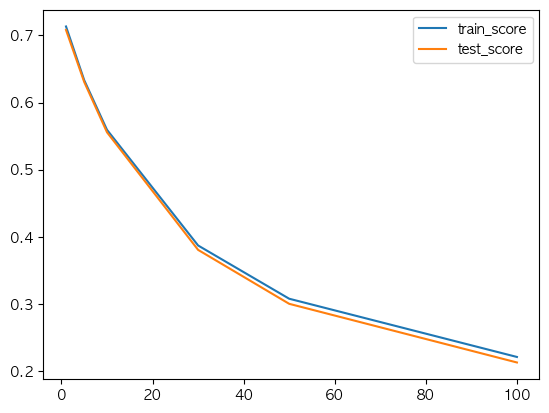

In [29]:
draw_score(metric_df)

### Elastic 모델에 대한 분석
- 다른 다중회귀분석 모델에 비해 다양한 변수를 참조하는 경향을 보이지만,
  성능적인 부분에서 다소 저하된 모습을 보임
- Ridge 모델과 비슷하게 alpha값이 늘어날수록 성능이 저하되는 경향성 또한 보이기 때문에
  alpha 값으로는 1을 선택함

### 모델 종합 및 결과도출

In [30]:
ridge = Ridge(random_state=777, alpha = 1)
ridge.fit(df_train_x, df_train_y)
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.8224310408408088
test data의 결정계수: 0.7983541012274402


In [31]:
lasso = Lasso(random_state=777, alpha = 100)
lasso.fit(df_train_x, df_train_y)
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.8224321703961993
test data의 결정계수: 0.7983931389731206


In [32]:
elastic = ElasticNet(random_state=777, alpha = 1)
elastic.fit(df_train_x, df_train_y)
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7132779529238836
test data의 결정계수: 0.7080859176234124


## 결론
1. 각 모델의 결론으로 미루어보았을 때, 과한 규제화는 오히려 데이터를 학습하는데 방해한다고 보여짐
2. 특히 Ridge와 Lasso 규제화를 합친 Elastic 모델의 경우 학습하는데 더욱 어려움이 있어 보임.